In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeVigoV2
from qiskit.providers.aer import Aer
from experiment import SparsePauliTomographyExperiment as bcexperiment
from matplotlib import pyplot as plt
from primitives.pauli import QiskitPauli
from perexperiment import PERExperiment

plt.style.use("ggplot")

backend = FakeVigoV2()

In [22]:
def executor(circuits):
    return backend.run(circuits, shots = 250).result().get_counts()

In [53]:
qc = QuantumCircuit(5)
qc.x(0)
qc.cx(0,1)
qc.cx(3,4)
qc.draw()

┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
q_2: ──────────
               
q_3: ──■───────
     ┌─┴─┐     
q_4: ┤ X ├─────
     └───┘

In [4]:
experiment = bcexperiment(circuits = [qc], inst_map = [0,1,2,3,4], backend = backend)

In [5]:
experiment.generate(samples = 5, single_samples = 5, depths = [2,4,16])

In [6]:
experiment.run(executor)

In [56]:
noisedataframe = experiment.analyze()

In [65]:
perexp = experiment.create_per_experiment([qc])

In [71]:
perexp.generate(["IIIZI", "IIIIZ"], 1000, noise_strengths = [0,.5,1])

In [72]:
perexp.run(executor)

In [73]:
circuit_results = perexp.analyze()

<AxesSubplot:>

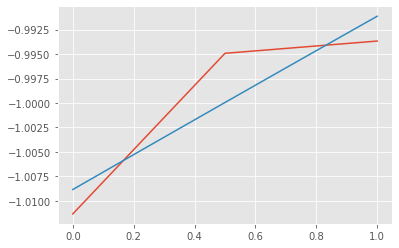

In [75]:
circuit_results[0].get_result("IIIIZ").plot()

In [31]:
layer1, = experiment.analysis.layer_data()

<AxesSubplot:>

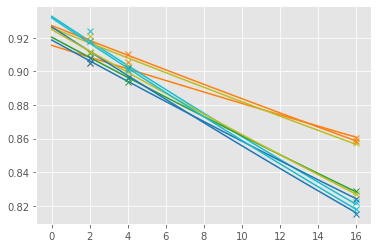

In [32]:
layer1.graph((1,2))

<AxesSubplot:>

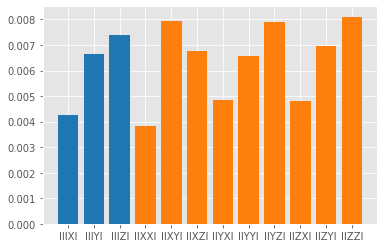

In [33]:
layer1.plot_infidelitites((1,),(1,2))

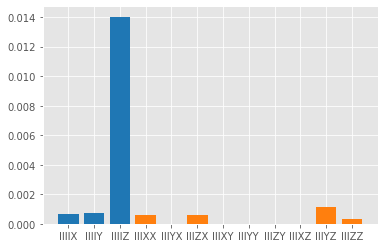

In [35]:
layer1.plot_coeffs((0,),(0,1))